In [1]:
import numpy as np
import pandas as pd
# import scipy.io
from scipy import io
import os
import glob
import matplotlib.pyplot as plt
import json

from sklearn.linear_model import LinearRegression

In [7]:
from scipy.io import loadmat, matlab
def load_mat(filename):
    """
    This function should be called instead of direct scipy.io.loadmat
    as it cures the problem of not properly recovering python dictionaries
    from mat files. It calls the function check keys to cure all entries
    which are still mat-objects
    """

    def _check_vars(d):
        """
        Checks if entries in dictionary are mat-objects. If yes
        todict is called to change them to nested dictionaries
        """
        for key in d:
            if isinstance(d[key], matlab.mio5_params.mat_struct):
                d[key] = _todict(d[key])
            elif isinstance(d[key], np.ndarray):
                d[key] = _toarray(d[key])
        return d

    def _todict(matobj):
        """
        A recursive function which constructs from matobjects nested dictionaries
        """
        d = {}
        for strg in matobj._fieldnames:
            elem = matobj.__dict__[strg]
            if isinstance(elem, matlab.mio5_params.mat_struct):
                d[strg] = _todict(elem)
            elif isinstance(elem, np.ndarray):
                d[strg] = _toarray(elem)
            else:
                d[strg] = elem
        return d

    def _toarray(ndarray):
        """
        A recursive function which constructs ndarray from cellarrays
        (which are loaded as numpy ndarrays), recursing into the elements
        if they contain matobjects.
        """
        if ndarray.dtype != 'float64':
            elem_list = []
            for sub_elem in ndarray:
                if isinstance(sub_elem, matlab.mio5_params.mat_struct):
                    elem_list.append(_todict(sub_elem))
                elif isinstance(sub_elem, np.ndarray):
                    elem_list.append(_toarray(sub_elem))
                else:
                    elem_list.append(sub_elem)
            return np.array(elem_list)
        else:
            return ndarray

    data = loadmat(filename, struct_as_record=False, squeeze_me=True)
    return _check_vars(data)

In [31]:
a = curr_file['trial_results'][0][1]['RT1']
len(a)

124

In [ ]:
nTrial = 300
nCatch = 5
nTotal = nTrial + nCatch
subList = glob.glob('S*.csv')
subInfo = []
subListMat = []
# for i, sub in enumerate(subList):
#     jfile = sub.replace('data.csv', 'subinfo.json')
#     with open(jfile) as json_file:
#         json_data = json.load(json_file)
#     age = json_data[0]["age"]
#     sex = json_data[0]["sex"]
#     reward = json_data[0]["reward"]
#     workerid = json_data[0]["workerid"]
#     assignmentid = json_data[0]["assignmentid"]
#     subInfo.append((sex,age, sub, reward))
#     print((sex,age,sub,reward))
#     print(workerid)
#     print(assignmentid)
#     subListMat.append(sub.replace('.csv', '.mat'))
# subInfo
# subListMat

In [ ]:
nTrial = 300
nCatch = 5
nTotal = nTrial + nCatch
subList = glob.glob('S*.csv')
i=0
sub=subList[0]
jfile = sub.replace('data.csv', 'subinfo.json')
with open(jfile) as json_file:
    json_data = json.load(json_file)
json_data


* Model 1: baseline model with $\alpha$, $\beta$, $w$, and $\gamma$

|  | sub1 | sub2 | sub3 | sub4 | sub5 | sub6 | sub7 | sub8 |
|-|-|-|-|-|-|-|-|-|
| age | 38 | 22 | 27 | 48 | 34 | 66 | 29 | 37 |
| sex | m | f | m | f | m | f | m | f |
| alpha | 0.19 | 0.98 | 0.03 | 0.36 | 0.37 | 0.20 | 0.11 | 0.31 |
| beta | 9.86 | 5.74 | 3.15 | 6.53 | 3.07 | 3.21 | 7.53 | 1.80 |
| w | 0.27 | 0.99 | 0.95 | 0.62 | 0.01 | 0.13 | 0.14 | 0.82 |
| gamma | 0.02 | 0.12 | 0.00 | 0.02 | 0.03 | 0.04 | 0.01 | 0.50 |
| reward | 161.00 | 161.00 | 147.00 | 134.00 | 144.00 | 128.00 | 145.00 | 153.00 |
| catch correct | 3.00 | 5.00 | 5.00 | 4.00 | 4.00 | 4.00 | 5.00 | 0.00 |
| valid trials | 297.00 | 298.00 | 297.00 | 298.00 | 298.00 | 299.00 | 300.00 | 292.00 |
| AIC | 487.11 | 572.25 | 821.93 | 624.35 | 751.68 | 807.73 | 639.33 | 812.44 |
| BIC | 33.77 | 34.10 | 34.83 | 34.28 | 34.65 | 34.80 | 34.32 | 34.81 |
| mean p(S1) | 0.63 | 0.64 | 0.50 | 0.56 | 0.57 | 0.51 | 0.54 | 0.50 |
| pval | 0.00 | 0.00 | 0.73 | 0.00 | 0.00 | 0.05 | 0.00 | 0.01 |
| t-stat | 10.81 | 11.64 | 0.35 | 6.66 | 9.32 | 1.99 | 4.52 | 2.48 |
| mean p(S2) | 0.85 | 0.72 | 0.52 | 0.74 | 0.56 | 0.54 | 0.75 | 0.50 |
| pval | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.19 |
| t-stat | 26.81 | 15.15 | 3.36 | 16.12 | 5.37 | 5.21 | 18.12 | 1.30 |

* Model 3: model with $\alpha$, $\beta$, and $w$ (without decay)

|  | sub1 | sub2 | sub3 | sub4 | sub5 | sub6 | sub7 | sub8 |
|-|-|-|-|-|-|-|-|-|
| age | 38 | 22 | 27 | 48 | 34 | 66 | 29 | 37 |
| sex | m | f | m | f | m | f | m | f |
| alpha | 0.06 | 0.91 | 0.04 | 0.39 | 0.11 | 0.27 | 0.13 | 0.96 |
| beta | 7.26 | 3.51 | 2.81 | 5.39 | 3.81 | 1.75 | 5.69 | 0.31 |
| w | 0.23 | 1.00 | 0.95 | 0.84 | 0.01 | 0.57 | 0.43 | 0.46 |
| reward | 161.00 | 161.00 | 147.00 | 134.00 | 144.00 | 128.00 | 145.00 | 153.00 |
| catch correct | 3.00 | 5.00 | 5.00 | 4.00 | 4.00 | 4.00 | 5.00 | 0.00 |
| valid trials | 297.00 | 298.00 | 297.00 | 298.00 | 298.00 | 299.00 | 300.00 | 292.00 |
| AIC | 547.52 | 602.70 | 818.79 | 646.84 | 761.43 | 816.49 | 654.95 | 812.50 |
| BIC | 28.31 | 28.51 | 29.13 | 28.65 | 28.98 | 29.12 | 28.68 | 29.11 |
| mean p(S1) | 0.58 | 0.60 | 0.50 | 0.54 | 0.57 | 0.50 | 0.54 | 0.50 |
| pval | 0.00 | 0.00 | 0.63 | 0.00 | 0.00 | 0.73 | 0.00 | 0.10 |
| t-stat | 7.93 | 9.98 | 0.48 | 5.01 | 9.36 | 0.35 | 4.92 | 1.66 |
| mean p(S2) | 0.83 | 0.73 | 0.52 | 0.72 | 0.54 | 0.53 | 0.72 | 0.50 |
| pval | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.18 |
| t-stat | 23.66 | 15.08 | 3.35 | 15.26 | 3.81 | 4.67 | 15.83 | 1.33 |

* Notes: 
1. Parameter recovery of model 3 is good (alpha = 0.87, beta = 0.91, w = 0.82), so reliable
2. Model 3 outperforms model 1 in BIC: should focus on model 3 for the following analyses?
3. $w$ are higher for model 3 
4. It is highly likely that the 3th, 6th, and 8th subject made random choices, based on: 1) low $\beta$, 2) high AIC/BIC scores, and  3) subjective values of selected options not significantly higher than 0.5 in stage 1. Also, sub 8 did not get any catch trials correct

In [ ]:
# [-0.74  0.    0.04 -0.02 -0.01]
# [-0.14 -0.   -0.   -0.07  0.  ]
# [-0.13 -0.   -0.01  0.05 -0.02]
# [ 0.15  0.    0.01 -0.02 -0.01]
# [ 0.44  0.    0.02 -0.04 -0.  ]
# [-0.08  0.    0.01  0.01 -0.01]
# [ 0.23 -0.   -0.04 -0.05  0.02]
# [-0.06 -0.   -0.08  0.01 -0.01]

# 1. Learning curve

In [ ]:
for i, sub in enumerate(subList):

    df = pd.DataFrame(pd.read_csv(sub))


    score = np.asarray(df['score'].iloc[-nTotal:])
    title = 'Learning curve of subject ' + str(i+1)
    plt.title(title)
    plt.xlabel('Number of trials')
    plt.ylabel('Score')
    plt.plot(range(nTotal),score)
    plt.show()


# 2. Do 1st-stage RTs correlate with subjective value difference?

## 2-2) Model 3

In [85]:
# # for i, sub in enumerate(subList):
# for i in range(197):
# #     rt1, rt2, Qvals_stage1, Qvals_stage2, Qmb_stage1, Qmf_stage1, prevWin, prevChoice1, stim_s1_left, choice1, trialnum = get_data(i)

# #     df = pd.DataFrame(pd.read_csv(sub))
# #     rt1 = df['rt_1'].iloc[-nTotal:]
# #     rt2 = df['rt_2'].iloc[-nTotal:]
#     data_filename = 'model1_trialdata_data_sub' + str(i+1) + '.txt'
#     value_filename = 'model1_trialdata_value_sub' + str(i+1) + '.txt'
#     data_filepath = os.path.join('./trialdata', data_filename)
#     value_filepath = os.path.join('./trialdata', value_filename)
# #     file = filepath.replace('.csv', '.mat.txt')

# #     trial_data = pd.read_csv(file, header=None)
    
#     trial_data = pd.read_csv(value_filepath, header=None)
#     other_data = pd.read_csv(data_filepath, header=None)
    
#     trialnum = other_data.iloc[:,0]
#     prevWin = other_data.iloc[:,1]
#     isLeft = other_data.iloc[:,2]
#     rt1 = other_data.iloc[:,3]
#     rt2 = other_data.iloc[:,4]
    
#     val_diff = np.abs(trial_data.iloc[:,2] - trial_data.iloc[:,3])
    
# #     print(Qvals_stage1)
# #     val_diff= np.abs(Qvals_stage1[:,0] - Qvals_stage1[:,1])
# #     val_diff = np.abs(trial_data.iloc[:,0] - trial_data.iloc[:,1])
    
# #     val_diff[val_diff==0] = 0.00001
    
    
#     x = val_diff
#     y = np.log(rt1[rt2!=-1])
    
#     slope, intercept = np.polyfit(x,y,1) # linear model adjustmen    
    
#     # to plot the adjusted model
#     x_line = np.linspace(np.min(x), np.max(x), 100)
#     y_line = np.polyval([slope, intercept], x_line)    
#     plt.plot(x_line, y_line, color = 'red')
#     correlation_coef = np.corrcoef(x,y)[0,1]
#     plt.annotate('r = '+str(np.round(correlation_coef,2)),
#         xy=(1,0),xycoords='axes fraction',
#         xytext=(-20, 20), textcoords='offset pixels',
#         horizontalalignment='right',
#         verticalalignment='bottom')     
#     title = 'Subject ' + str(i+1)
#     plt.title(title)
#     plt.xlabel('Subjective value difference')
#     plt.ylabel('log RT')
        
#     plt.scatter(x,y)
#     plt.show()

# 3. Do 2nd-stage RTs correlate with subjective value difference?

## 3-2) Model 3

In [88]:
# malsubjects = [12, 27, 34, 38, 76, 104]
malsubjects = [16, 40, 64, 96, 140, 143, 154]
valid_subind = pd.read_csv('valid_subind.txt')
validind = np.array(valid_subind)

In [87]:
# for i in range(197):
# #     rt1, rt2, Qvals_stage1, Qvals_stage2, Qmb_stage1, Qmf_stage1, prevWin, prevChoice1, stim_s1_left, choice1, trialnum = get_data(i)

# #     df = pd.DataFrame(pd.read_csv(sub))
# #     rt1 = df['rt_1'].iloc[-nTotal:]
# #     rt2 = df['rt_2'].iloc[-nTotal:]
#     data_filename = 'model1_trialdata_data_sub' + str(i+1) + '.txt'
#     value_filename = 'model1_trialdata_value_sub' + str(i+1) + '.txt'
#     data_filepath = os.path.join('./trialdata', data_filename)
#     value_filepath = os.path.join('./trialdata', value_filename)
# #     file = filepath.replace('.csv', '.mat.txt')

# #     trial_data = pd.read_csv(file, header=None)
    
#     trial_data = pd.read_csv(value_filepath, header=None)
#     other_data = pd.read_csv(data_filepath, header=None)
    
#     trialnum = other_data.iloc[:,0]
#     prevWin = other_data.iloc[:,1]
#     isLeft = other_data.iloc[:,2]
#     rt1 = other_data.iloc[:,3]
#     rt2 = other_data.iloc[:,4]
#     val_diff = np.abs(trial_data.iloc[:,2] - trial_data.iloc[:,3])

#     val_diff[val_diff==0] = 0.00001


#     x = val_diff
#     y = np.log(rt2[rt2!=-1])

#     slope, intercept = np.polyfit(x,y,1) # linear model adjustmen    

#     # to plot the adjusted model
#     x_line = np.linspace(np.min(x), np.max(x), 100)
#     y_line = np.polyval([slope, intercept], x_line)    
#     plt.plot(x_line, y_line, color = 'red')
#     correlation_coef = np.corrcoef(x,y)[0,1]
#     plt.annotate('r = '+str(np.round(correlation_coef,2)),
#         xy=(1,0),xycoords='axes fraction',
#         xytext=(-20, 20), textcoords='offset pixels',
#         horizontalalignment='right',
#         verticalalignment='bottom')     
#     title = 'Subject ' + str(i+1)
#     plt.title(title)
#     plt.xlabel('Subjective value difference')
#     plt.ylabel('log RT')

#     plt.scatter(x,y)
#     plt.show()

# 4. Regression: MB+MF as subjective value (w * MB + (1-w) * MF)

## 4-2) Model 3

In [89]:

# malsubjects += 1
coef_x1 = []
R2 = []
for i in range(197):
    if (i+1 in validind) and (i not in malsubjects):
    #     rt1, rt2, Qvals_stage1, Qvals_stage2, Qmb_stage1, Qmf_stage1, prevWin, prevChoice1, stim_s1_left, choice1, trialnum = get_data(i)

    #     df = pd.DataFrame(pd.read_csv(sub))
    #     rt1 = df['rt_1'].iloc[-nTotal:]
    #     rt2 = df['rt_2'].iloc[-nTotal:]
        data_filename = 'model1_trialdata_data_sub' + str(i+1) + '.txt'
        value_filename = 'model1_trialdata_value_sub' + str(i+1) + '.txt'
        data_filepath = os.path.join('./trialdata', data_filename)
        value_filepath = os.path.join('./trialdata', value_filename)
    #     file = filepath.replace('.csv', '.mat.txt')

    #     trial_data = pd.read_csv(file, header=None)

        trial_data = pd.read_csv(value_filepath, header=None)
        other_data = pd.read_csv(data_filepath, header=None)

        trialnum = other_data.iloc[:,0]
        prevWin = other_data.iloc[:,1]
        isLeft = other_data.iloc[:,2]
        rt1 = other_data.iloc[:,3]
        rt2 = other_data.iloc[:,4]

        x2 = trialnum # regressor 2: trial number 
        x3 = prevWin # regressor 3: if previous outcome was rewarded or no-reward
        x4 = isLeft


        val_diff = np.abs(trial_data.iloc[:,0] - trial_data.iloc[:,1])
    #     val_diff = trial_data.iloc[:,0] - trial_data.iloc[:,1]

        x1 = np.array(val_diff) # regressor of interest: absolute subjective value-difference
    #     x3_= np.array(r[rt2!=-1])

    #     x4 = np.array(isLeft[rt2!=-1].astype(int)) # regressor 4: which button used (just Left)
    #     x5 = np.zeros(len(val_diff)) # regressor 5: experience of each rocket pair
    #     x6 = np.zeros(len(val_diff)) # regressor 6: experience of each chosen rocket

    #     for j in range(len(val_diff)):
    #         x5[j] = np.count_nonzero(current_state_index[:j] == current_state_index[j])
    #         x6[j] = np.count_nonzero(choice1[:j] == choice1[j])






        x = np.c_[x1,x2,x3,x4]
        y = np.array(np.log(rt1[rt2!=-1]))

        mlr = LinearRegression()
        mlr.fit(x, y)
#         print(np.round(mlr.coef_,2), np.round(mlr.score(x,y),2))
        coef_x1.append(mlr.coef_[0])
        R2.append(mlr.score(x,y))
print(np.mean(np.array(coef_x1)))
print(np.mean(np.array(R2)))


-0.04845433174674473
0.08257383448174782


## 3) Model 3: signed

In [90]:
# malsubjects += 1
coef_x1 = []
R2 = []
for i in range(197):
    if (i+1 in validind) and (i not in malsubjects):
    #     rt1, rt2, Qvals_stage1, Qvals_stage2, Qmb_stage1, Qmf_stage1, prevWin, prevChoice1, stim_s1_left, choice1, trialnum = get_data(i)

    #     df = pd.DataFrame(pd.read_csv(sub))
    #     rt1 = df['rt_1'].iloc[-nTotal:]
    #     rt2 = df['rt_2'].iloc[-nTotal:]
        data_filename = 'model1_trialdata_data_sub' + str(i+1) + '.txt'
        value_filename = 'model1_trialdata_value_sub' + str(i+1) + '.txt'
        data_filepath = os.path.join('./trialdata', data_filename)
        value_filepath = os.path.join('./trialdata', value_filename)
    #     file = filepath.replace('.csv', '.mat.txt')

    #     trial_data = pd.read_csv(file, header=None)

        trial_data = pd.read_csv(value_filepath, header=None)
        other_data = pd.read_csv(data_filepath, header=None)

        trialnum = other_data.iloc[:,0]
        prevWin = other_data.iloc[:,1]
        isLeft = other_data.iloc[:,2]
        rt1 = other_data.iloc[:,3]
        rt2 = other_data.iloc[:,4]

        x2 = trialnum # regressor 2: trial number 
        x3 = prevWin # regressor 3: if previous outcome was rewarded or no-reward
        x4 = isLeft


        val_diff = trial_data.iloc[:,0] - trial_data.iloc[:,1]
    #     val_diff = trial_data.iloc[:,0] - trial_data.iloc[:,1]

        x1 = np.array(val_diff) # regressor of interest: absolute subjective value-difference
    #     x3_= np.array(r[rt2!=-1])

    #     x4 = np.array(isLeft[rt2!=-1].astype(int)) # regressor 4: which button used (just Left)
    #     x5 = np.zeros(len(val_diff)) # regressor 5: experience of each rocket pair
    #     x6 = np.zeros(len(val_diff)) # regressor 6: experience of each chosen rocket

    #     for j in range(len(val_diff)):
    #         x5[j] = np.count_nonzero(current_state_index[:j] == current_state_index[j])
    #         x6[j] = np.count_nonzero(choice1[:j] == choice1[j])






        x = np.c_[x1,x2,x3,x4]
        y = np.array(np.log(rt1[rt2!=-1]))

        mlr = LinearRegression()
        mlr.fit(x, y)
#         print(np.round(mlr.coef_,2), np.round(mlr.score(x,y),2))
        coef_x1.append(mlr.coef_[0])
        R2.append(mlr.score(x,y))
print(np.mean(np.array(coef_x1)))
print(np.mean(np.array(R2)))


-0.014287434195581261
0.08127878601670314


## 4-5) Model 3 - 2nd stage

In [92]:
# malsubjects += 1
coef_x1 = []
R2 = []
for i in range(197):
    if (i+1 in validind) and (i not in malsubjects):
    #     rt1, rt2, Qvals_stage1, Qvals_stage2, Qmb_stage1, Qmf_stage1, prevWin, prevChoice1, stim_s1_left, choice1, trialnum = get_data(i)

    #     df = pd.DataFrame(pd.read_csv(sub))
    #     rt1 = df['rt_1'].iloc[-nTotal:]
    #     rt2 = df['rt_2'].iloc[-nTotal:]
        data_filename = 'model1_trialdata_data_sub' + str(i+1) + '.txt'
        value_filename = 'model1_trialdata_value_sub' + str(i+1) + '.txt'
        data_filepath = os.path.join('./trialdata', data_filename)
        value_filepath = os.path.join('./trialdata', value_filename)
    #     file = filepath.replace('.csv', '.mat.txt')

    #     trial_data = pd.read_csv(file, header=None)

        trial_data = pd.read_csv(value_filepath, header=None)
        other_data = pd.read_csv(data_filepath, header=None)

        trialnum = other_data.iloc[:,0]
        prevWin = other_data.iloc[:,1]
        isLeft = other_data.iloc[:,2]
        rt1 = other_data.iloc[:,3]
        rt2 = other_data.iloc[:,4]

        x2 = trialnum # regressor 2: trial number 
        x3 = prevWin # regressor 3: if previous outcome was rewarded or no-reward
        x4 = isLeft


        val_diff = np.abs(trial_data.iloc[:,2] - trial_data.iloc[:,3])
    #     val_diff = trial_data.iloc[:,0] - trial_data.iloc[:,1]

        x1 = np.array(val_diff) # regressor of interest: absolute subjective value-difference
    #     x3_= np.array(r[rt2!=-1])

    #     x4 = np.array(isLeft[rt2!=-1].astype(int)) # regressor 4: which button used (just Left)
    #     x5 = np.zeros(len(val_diff)) # regressor 5: experience of each rocket pair
    #     x6 = np.zeros(len(val_diff)) # regressor 6: experience of each chosen rocket

    #     for j in range(len(val_diff)):
    #         x5[j] = np.count_nonzero(current_state_index[:j] == current_state_index[j])
    #         x6[j] = np.count_nonzero(choice1[:j] == choice1[j])






        x = np.c_[x1,x2,x3,x4]
        y = np.array(np.log(rt2[rt2!=-1]))

        mlr = LinearRegression()
        mlr.fit(x, y)
#         print(np.round(mlr.coef_,2), np.round(mlr.score(x,y),2))
        coef_x1.append(mlr.coef_[0])
        R2.append(mlr.score(x,y))
print(np.mean(np.array(coef_x1)))
print(np.mean(np.array(R2)))


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# 5. Regression: just MB as subjective value

## 5-2) Model 3

In [101]:
MB_coef_x1 = []
MB_R2 = []

for i in range(197):
    if (i+1 in validind) and (i not in malsubjects):

        data_filename = 'model1_trialdata_data_sub' + str(i+1) + '.txt'
        value_filename = 'model1_trialdata_value_sub' + str(i+1) + '.txt'
        data_filepath = os.path.join('./trialdata', data_filename)
        value_filepath = os.path.join('./trialdata', value_filename)

        trial_data = pd.read_csv(value_filepath, header=None)
        other_data = pd.read_csv(data_filepath, header=None)

        trialnum = other_data.iloc[:,0]
        prevWin = other_data.iloc[:,1]
        isLeft = other_data.iloc[:,2]
        
        prevWin[0] = 0
        
        rt1 = other_data.iloc[:,3]
        rt2 = other_data.iloc[:,4]

        x2 = trialnum # regressor 2: trial number 
        x3 = prevWin # regressor 3: if previous outcome was rewarded or no-reward
        x4 = isLeft
        val_diff = np.abs(trial_data.iloc[:,4] - trial_data.iloc[:,5])
    #     val_diff = trial_data.iloc[:,8] - trial_data.iloc[:,9]

        x1 = np.array(val_diff) # regressor of interest: absolute subjective value-difference
        x = np.c_[x1,x2,x3,x4]
#         y = np.array(rt1[rt2!=-1])
        y = np.array(np.log(rt1))

        mlr = LinearRegression()
        mlr.fit(x, y)
#         print(np.round(mlr.coef_,2), np.round(mlr.score(x,y),2))
        MB_coef_x1.append(mlr.coef_[0])
        MB_R2.append(mlr.score(x,y))
        
#         if np.abs(mlr.coef_[0]) > 100:
#             print('Subject {} is suspicious'.format(i))
#             print(x1)
print(np.mean(np.array(MB_coef_x1)))
print(np.mean(np.array(MB_R2)))


0.016329916565145843
0.08113695103138277


## 5-3) Model 3: Signed subjective value difference

In [132]:
MB_coef_x1_sign = []
MB_R2_sign = []
w0=[]
w_file = 'w.txt'
w = pd.read_csv(w_file,header=None)
w = np.asarray(w)
for i in range(197):
    if (i+1 in validind) and (i not in malsubjects):

        data_filename = 'model1_trialdata_data_sub' + str(i+1) + '.txt'
        value_filename = 'model1_trialdata_value_sub' + str(i+1) + '.txt'
        
        data_filepath = os.path.join('./trialdata', data_filename)
        value_filepath = os.path.join('./trialdata', value_filename)
#         w_filepath = 
        trial_data = pd.read_csv(value_filepath, header=None)
        other_data = pd.read_csv(data_filepath, header=None)
        
        w0.append(w[i])
        trialnum = other_data.iloc[:,0]
        prevWin = other_data.iloc[:,1]
        isLeft = other_data.iloc[:,2]
        
        prevWin[0] = 0
        
        rt1 = other_data.iloc[:,3]
        rt2 = other_data.iloc[:,4]

        x2 = trialnum # regressor 2: trial number 
        x3 = prevWin # regressor 3: if previous outcome was rewarded or no-reward
        x4 = isLeft
        val_diff = trial_data.iloc[:,4] - trial_data.iloc[:,5]

        x1 = np.array(val_diff) # regressor of interest: absolute subjective value-difference
        x = np.c_[x1,x2,x3,x4]
#         y = np.array(rt1[rt2!=-1])
        y = np.array(np.log(rt1))

        mlr = LinearRegression()
        mlr.fit(x, y)
#         print(np.round(mlr.coef_,2), np.round(mlr.score(x,y),2))
        MB_coef_x1_sign.append(mlr.coef_[0])
        MB_R2_sign.append(mlr.score(x,y))
        
#         if np.abs(mlr.coef_[0]) > 100:
#             print('Subject {} is suspicious'.format(i))
#             print(x1)
print(np.mean(np.array(MB_coef_x1_sign)))
print(np.mean(np.array(MB_R2_sign)))

w0

0.05975991000733802
0.08044501248465963


[array([1.7445e-09]),
 array([1.]),
 array([0.63071]),
 array([0.62425]),
 array([1.]),
 array([2.7582e-08]),
 array([0.51009]),
 array([1.1095e-07]),
 array([1.]),
 array([1.2607e-08]),
 array([0.68838]),
 array([2.6245e-09]),
 array([0.51906]),
 array([3.0716e-09]),
 array([0.34469]),
 array([8.395e-09]),
 array([0.3746]),
 array([0.36426]),
 array([2.9652e-09]),
 array([1.3557e-07]),
 array([3.0774e-09]),
 array([0.79673]),
 array([0.00091324]),
 array([0.44467]),
 array([0.11099]),
 array([0.57623]),
 array([3.1046e-08]),
 array([0.92376]),
 array([2.7522e-09]),
 array([3.9616e-09]),
 array([1.6844e-09]),
 array([1.7141e-08]),
 array([0.13174]),
 array([4.915e-09]),
 array([0.7232]),
 array([1.0908e-07]),
 array([0.5897]),
 array([0.56643]),
 array([0.78187]),
 array([5.1358e-08]),
 array([0.61798]),
 array([0.90983]),
 array([1.4131e-08]),
 array([5.1581e-09]),
 array([7.2184e-09]),
 array([4.7049e-09]),
 array([0.77379]),
 array([0.13421]),
 array([0.62908]),
 array([0.33224]),
 

# 6. Regression: just MF as subjective value

## 6-2) Model 3

In [99]:
MF_coef_x1 = []
MF_R2 = []

for i in range(197):
    if (i+1 in validind) and (i not in malsubjects):

        data_filename = 'model1_trialdata_data_sub' + str(i+1) + '.txt'
        value_filename = 'model1_trialdata_value_sub' + str(i+1) + '.txt'
        data_filepath = os.path.join('./trialdata', data_filename)
        value_filepath = os.path.join('./trialdata', value_filename)

        trial_data = pd.read_csv(value_filepath, header=None)
        other_data = pd.read_csv(data_filepath, header=None)

        trialnum = other_data.iloc[:,0]
        prevWin = other_data.iloc[:,1]
        isLeft = other_data.iloc[:,2]
        
        prevWin[0] = 0
        
        rt1 = other_data.iloc[:,3]
        rt2 = other_data.iloc[:,4]

        x2 = trialnum # regressor 2: trial number 
        x3 = prevWin # regressor 3: if previous outcome was rewarded or no-reward
        x4 = isLeft
        val_diff = np.abs(trial_data.iloc[:,6] - trial_data.iloc[:,7])
    #     val_diff = trial_data.iloc[:,8] - trial_data.iloc[:,9]

        x1 = np.array(val_diff) # regressor of interest: absolute subjective value-difference
        x = np.c_[x1,x2,x3,x4]
#         y = np.array(rt1[rt2!=-1])
        y = np.array(np.log(rt1))

        mlr = LinearRegression()
        mlr.fit(x, y)
#         print(np.round(mlr.coef_,2), np.round(mlr.score(x,y),2))
        MF_coef_x1.append(mlr.coef_[0])
        MF_R2.append(mlr.score(x,y))
        
#         if np.abs(mlr.coef_[0]) > 100:
#             print('Subject {} is suspicious'.format(i))
#             print(x1)
print(np.mean(np.array(MF_coef_x1)))
print(np.mean(np.array(MF_R2)))

-0.041077949241828414
0.08149089936022527


## 6-3) Signed subjective value difference

In [100]:
MF_coef_x1_sign = []
MF_R2_sign = []

for i in range(197):
    if (i+1 in validind) and (i not in malsubjects):

        data_filename = 'model1_trialdata_data_sub' + str(i+1) + '.txt'
        value_filename = 'model1_trialdata_value_sub' + str(i+1) + '.txt'
        data_filepath = os.path.join('./trialdata', data_filename)
        value_filepath = os.path.join('./trialdata', value_filename)

        trial_data = pd.read_csv(value_filepath, header=None)
        other_data = pd.read_csv(data_filepath, header=None)

        trialnum = other_data.iloc[:,0]
        prevWin = other_data.iloc[:,1]
        isLeft = other_data.iloc[:,2]
        
        prevWin[0] = 0
        
        rt1 = other_data.iloc[:,3]
        rt2 = other_data.iloc[:,4]

        x2 = trialnum # regressor 2: trial number 
        x3 = prevWin # regressor 3: if previous outcome was rewarded or no-reward
        x4 = isLeft
        val_diff = trial_data.iloc[:,6] - trial_data.iloc[:,7]
    #     val_diff = trial_data.iloc[:,8] - trial_data.iloc[:,9]

        x1 = np.array(val_diff) # regressor of interest: absolute subjective value-difference
        x = np.c_[x1,x2,x3,x4]
#         y = np.array(rt1[rt2!=-1])
        y = np.array(np.log(rt1))

        mlr = LinearRegression()
        mlr.fit(x, y)
#         print(np.round(mlr.coef_,2), np.round(mlr.score(x,y),2))
        MF_coef_x1_sign.append(mlr.coef_[0])
        MF_R2_sign.append(mlr.score(x,y))
        
#         if np.abs(mlr.coef_[0]) > 100:
#             print('Subject {} is suspicious'.format(i))
#             print(x1)
print(np.mean(np.array(MF_coef_x1_sign)))
print(np.mean(np.array(MF_R2_sign)))

-0.022127883950419428
0.08112484486898083


In [105]:
# np.hstack((np.array(MB_coef_x1), np.array(MF_coef_x1)))

In [102]:
ratio = np.array(MB_coef_x1)/np.array(MF_coef_x1)
# ratio
np.mean(ratio)

-12.95077412871601

In [109]:
np.mean(MB_coef_x1)

0.016329916565145843

In [118]:
np.mean(MF_coef_x1)

-0.041077949241828414

In [121]:
import scipy

In [124]:
t,p = scipy.stats.ttest_ind(MB_coef_x1,MF_coef_x1)

In [125]:
t

0.7210477881038444

In [126]:
p

0.47149042286193166

In [117]:
np.mean(np.array(MB_coef_x1)/np.array(MF_coef_x1))

-12.95077412871601

(array([  1.,   0.,   0.,   1.,   1.,  14., 100.,  16.,   5.,   1.]),
 array([-6.23845739, -5.27254948, -4.30664156, -3.34073365, -2.37482574,
        -1.40891782, -0.44300991,  0.522898  ,  1.48880591,  2.45471383,
         3.42062174]),
 <BarContainer object of 10 artists>)

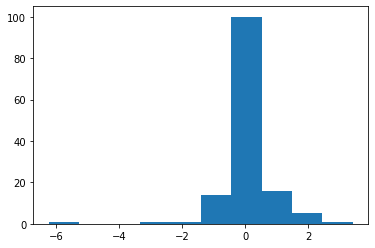

In [110]:
plt.hist(MB_coef_x1)

(array([ 1.,  0.,  0.,  1.,  2., 28., 87., 14.,  3.,  3.]),
 array([-2.59438373, -2.19245529, -1.79052686, -1.38859843, -0.98666999,
        -0.58474156, -0.18281313,  0.2191153 ,  0.62104374,  1.02297217,
         1.4249006 ]),
 <BarContainer object of 10 artists>)

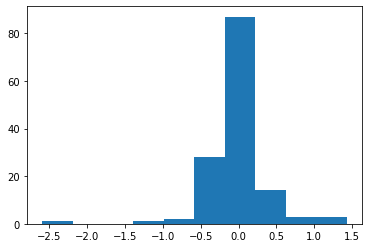

In [111]:
plt.hist(MF_coef_x1)

In [106]:
ratio

array([-4.71674820e+00,  7.52960573e-01,  1.44258400e-02,  4.68290576e-01,
       -1.22958322e+01,  6.50756200e+00, -1.65622803e+00,  4.32488009e-01,
       -6.66026677e+00,  4.73306395e-01, -1.51689454e+01,  3.42758602e+00,
       -3.62639999e+00, -4.01666171e+00,  2.70408731e+00, -2.31725079e+00,
        8.38721376e-01, -9.95423832e-01,  2.13465821e+00, -1.71427045e+00,
        7.02880749e+00,  1.53104790e+00, -5.41355741e-01, -3.79265251e+00,
        9.54132470e-01, -4.33784191e+00,  5.41553935e+00,  4.50012217e-01,
       -7.55056924e+01,  5.70592713e-01,  2.53805269e+00,  4.98397059e-01,
        1.31970756e+00, -6.82863758e+00,  3.30077532e+00, -1.08809365e+00,
        9.73131780e-01,  1.65069409e+00, -2.49269819e+00,  1.74939200e+00,
        4.88401965e+00,  3.67776117e+00, -2.00234910e-01,  4.14010978e-01,
       -6.79273388e+00,  1.61222751e+00, -3.58923200e-01,  3.00764739e+01,
        3.83898947e+01,  3.56204899e-01, -3.89004255e+00, -2.18379768e+00,
        2.27775536e+01,  

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 138.]),
 array([-1811.55905222, -1626.56415753, -1441.56926284, -1256.57436815,
        -1071.57947346,  -886.58457877,  -701.58968408,  -516.59478939,
         -331.5998947 ,  -146.60500001,    38.38989468]),
 <BarContainer object of 10 artists>)

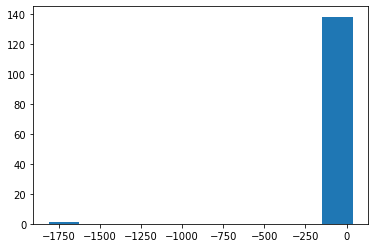

In [108]:
plt.hist(ratio)

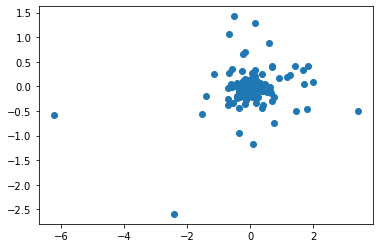

In [103]:
plt.scatter(MB_coef_x1, MF_coef_x1)

In [ ]:
MF_coef_x1

(array([[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]]),
 array([1.04240000e-09, 1.00000001e-01, 2.00000001e-01, 3.00000001e-01,
        4.00000001e-01, 5.00000001e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <a list of 139 BarContainer objects>)

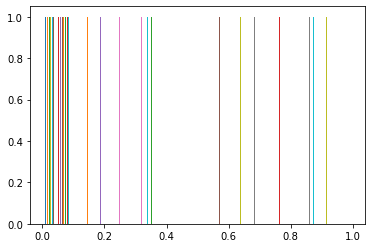

In [133]:
plt.hist(w0)

In [134]:
np.mean(w0)

0.29552064983229503